In [ ]:
# A notebook show the difference in measurments between TESS and TASTE

In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import interp1d
from scipy import optimize
import random
%matplotlib notebook


Predicted:  6210.923509999999
O-C:  0.0027872027067132876


<IPython.core.display.Javascript object>


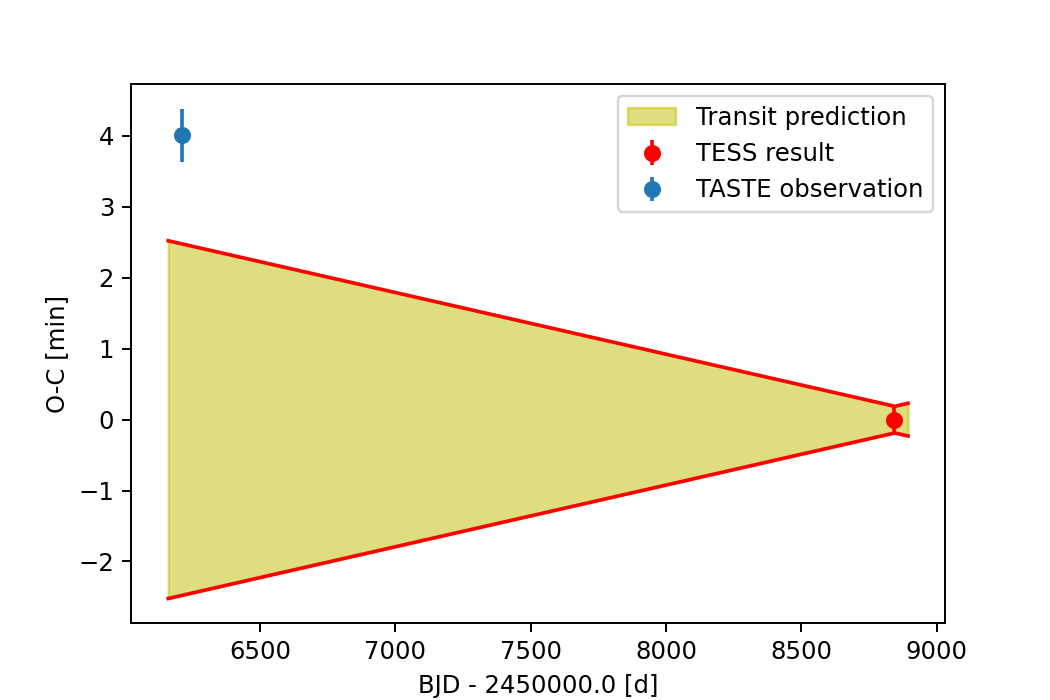

0.0027872027067132876


In [18]:
#Transits measured

TASTE_Tc = [5892.529524, 0.000264, 0.000259] #5892.54581
TESS_Tc = [8843.75522, 0.00013, 0.00013]

P = [2.61453, 0.00000158 , 0.00000158 ]

TASTE_Tc[0] = TESS_Tc[0] - 1007*P[0] + np.random.normal(0, 0.00158)


# Linear ephemeris:
predicted = np.around((TASTE_Tc[0]-TESS_Tc[0])/P[0]) * P[0] + TESS_Tc[0]
variation = TASTE_Tc[0] - predicted

print('Predicted: ', predicted)
print('O-C: ', variation)


# array of times:
time_array = np.arange( min(TESS_Tc[0],TASTE_Tc[0]) - 50,  max(TESS_Tc[0],TASTE_Tc[0]) + 50, 0.1 )

# Error propagation: 
sigma_minus = (-np.abs(time_array-TESS_Tc[0])/P[0] * P[1] - TESS_Tc[1] ) * 1440.
sigma_plus  = ( np.abs(time_array-TESS_Tc[0])/P[0] * P[2] + TESS_Tc[2] ) * 1440.


plt.figure(figsize=(6,4))
plt.plot(time_array, sigma_minus, c='red')
plt.plot(time_array, sigma_plus, c='red')
plt.fill_between(time_array, sigma_minus, sigma_plus, color='y', alpha=0.5, label='Transit prediction')
plt.errorbar(TESS_Tc[0], 0.00, yerr=[[TESS_Tc[1]* 1440.], [TESS_Tc[2]* 1440]], c='red', fmt='o', label='TESS result')
plt.errorbar(TASTE_Tc[0], variation* 1440, yerr=[[TASTE_Tc[1]* 1440.], [TASTE_Tc[2]* 1440.]], fmt='o', label='TASTE observation')

plt.xlabel('BJD - 2450000.0 [d]')
plt.ylabel('O-C [min]')
#plt.ylim(-20,20)
plt.legend()
plt.show()
#Transit prediction

print(variation)

<IPython.core.display.Javascript object>


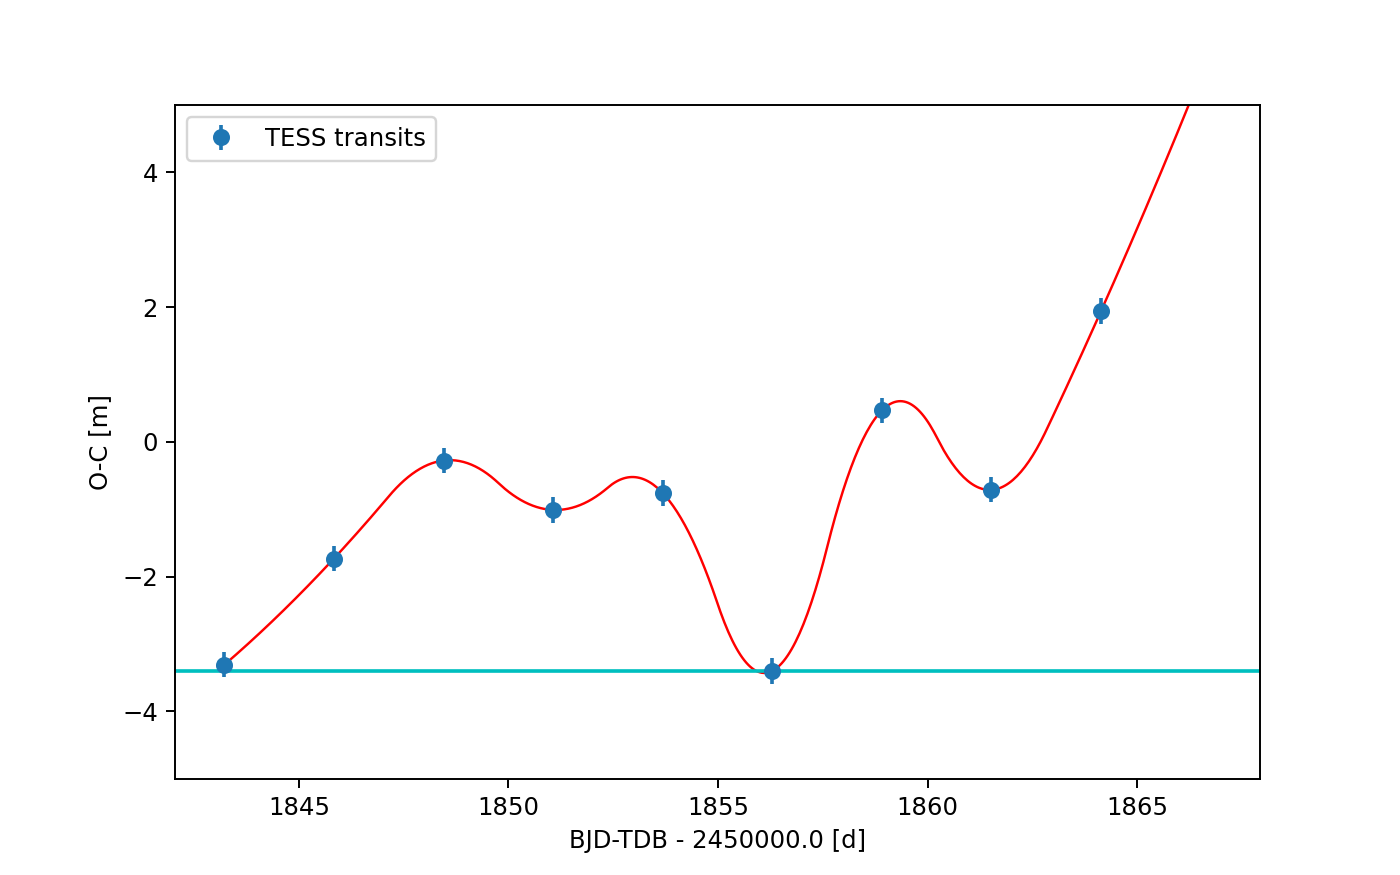

In [22]:

TESS_Tr = [1843.2186521,1845.83405896,1848.44946583,1851.06487269,1853.68027955,1856.29568642,1858.91109328,1861.52650014,1864.14190701,1866.75731387]
TESS_Tr2 = [1843.2186521,1845.83405896,1848.44946583,1851.06487269,1853.68027955,1856.29568642,1858.91109328,1861.52650014,1864.14190701,1866.75731387]
TESS_Tc = [1843.75522, 0.00013, 0.00013]
dd =[]
error = [0.00013] * 10
P = [2.61453, 0.00000158 , 0.00000158]
     
plt.figure(figsize=(8,5))
    
for i in range(len(error)):
    TESS_Tr[i] = TESS_Tc[0] + 1007*P[0] + np.random.normal(0, 0.00158)
    predicted = np.around((TESS_Tr[i]-TESS_Tc[0])/P[0]) * P[0] + TESS_Tc[0]
    variation = predicted - TESS_Tr[i] 
    dd.append(variation*1440)


x2 = TESS_Tr2
y2 = dd
x_new = np.linspace(min(x2), max(x2),500)
f = interp1d(x2, y2, kind='quadratic')
y_smooth=f(x_new)

plt.errorbar(TESS_Tr2, dd, yerr=0.00013* 1440, fmt='o', label="TESS transits",zorder=2)
plt.plot(x_new,y_smooth,color='red', linewidth=1,zorder=1)
plt.xlabel('BJD-TDB - 2450000.0 [d]')
plt.ylabel('O-C [m]')
plt.ylim(-5,5)
plt.axhline(max(y2), color='c')
plt.axhline(min(y2), color='c')
plt.legend()



8843.2186521
0.0
8845.833182100001
0.0008768599982431624
8848.4477121
0.001753729999109055
8851.0622421
0.0026305899991712067
8853.6767721
0.003507450001052348
8856.2913021
0.004384320000099251
8858.905832100001
0.0052611799983424135
8861.5203621
0.006138040000223555
8864.1348921
0.007014909999270458
8866.7494221
0.007891770001151599


<IPython.core.display.Javascript object>


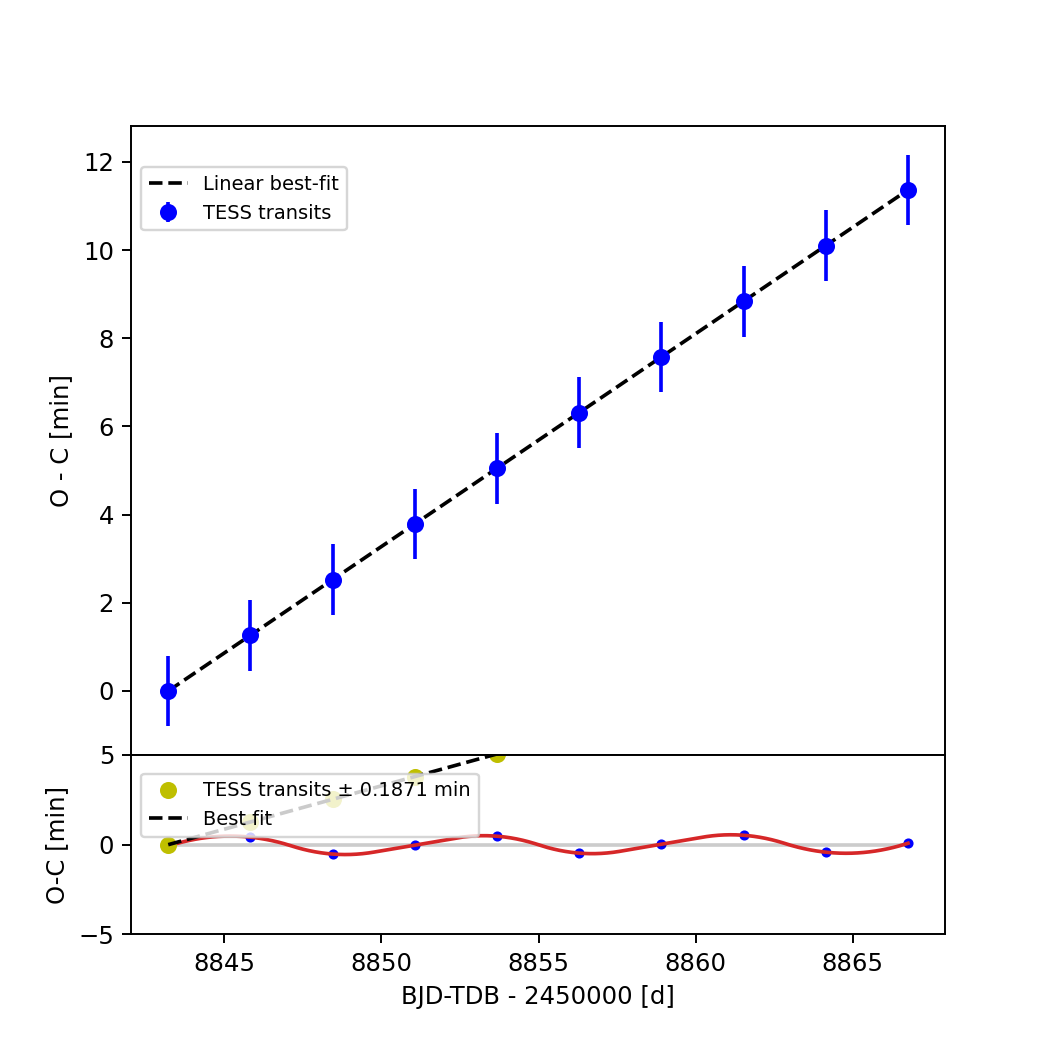

Text(0.5, 0, 'BJD - 2450000 [d]')

In [23]:

TESS = [8843.2186521,8845.83405896,8848.44946583,8851.06487269,8853.68027955,8856.29568642,8858.91109328,8861.52650014,8864.14190701,8866.75731387]
TESS0 = 8843.2186521
P1 = 2.61453
dataT =[]
for i in range(len(TESS)):
    predicted1 = (i*P1)+TESS0
    print(predicted1)
    variation1 = TESS[i] - ((i*P1)+TESS0)
    print(variation1)
    dataT.append((variation1*1440))
    
coef = np.polyfit(TESS,dataT,1)
poly1d_fn = np.poly1d(coef) 

fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(8,8, hspace=-0.5, wspace=0.0)
x = fig.add_subplot(grid[0:6, 0:])
x.errorbar(TESS,dataT, yerr=random.uniform(0.00040,0.00067)*1440, fmt='bo', label="TESS transits")
x.plot(TESS, poly1d_fn(TESS), '--k', label="Linear best-fit")
#plt.scatter(TESS, dataT, marker='o', color='blue', label="TESS transits \u00B1 0.1871 min", zorder=2)
#x.set_xlabel('BJD-TDB - 2450000 [d]')
x.set_ylabel('O - C [min]')
x.set_xticks([])
x.legend(loc=2, bbox_to_anchor=(0.0,0.95),  prop={'size': 8})


res = poly1d_fn(TESS) - dataT 
x = TESS
y = res
x_new = np.linspace(min(x), max(x),500)
f = interp1d(x, y, kind='quadratic')
y_smooth=f(x_new)

y = fig.add_subplot(grid[7, 0:])

y.scatter(TESS, res*1e5, c='b', s=10)
yas = np.zeros(len(TESS))
y.plot(TESS, yas, alpha=0.2, color='black')
y.plot(x_new,y_smooth*1e5, color="C3")
y.set_ylim(-5,5)
y.set_ylabel('Residual $×10^{-5}$ [min]')
y.set_xlabel("BJD - 2450000 [d]")



<IPython.core.display.Javascript object>


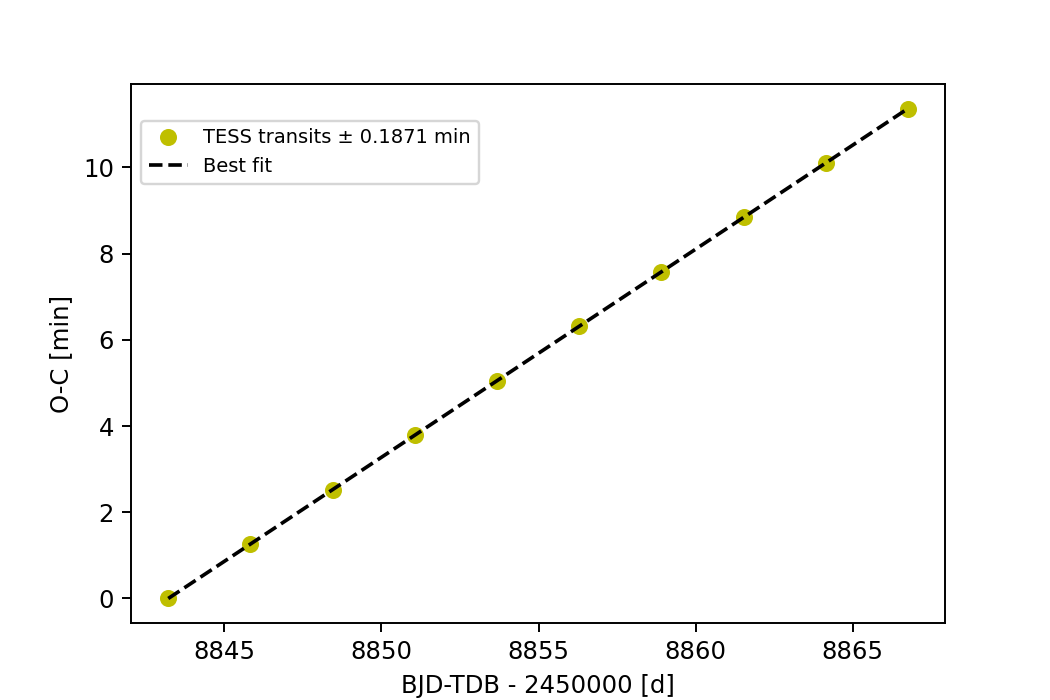

In [25]:
plt.figure(figsize=(6, 4))

plt.plot(TESS,dataT, 'yo', label="TESS transits \u00B1 0.1871 min")
plt.plot(TESS, poly1d_fn(TESS), '--k', label="Best fit")
#plt.scatter(TESS, dataT, marker='o', color='blue', label="TESS transits \u00B1 0.1871 min", zorder=2)
plt.xlabel('BJD-TDB - 2450000 [d]')
plt.ylabel('O-C [min]')
plt.legend(loc=2, bbox_to_anchor=(0.0,0.95),  prop={'size': 8})
plt.show()


<IPython.core.display.Javascript object>


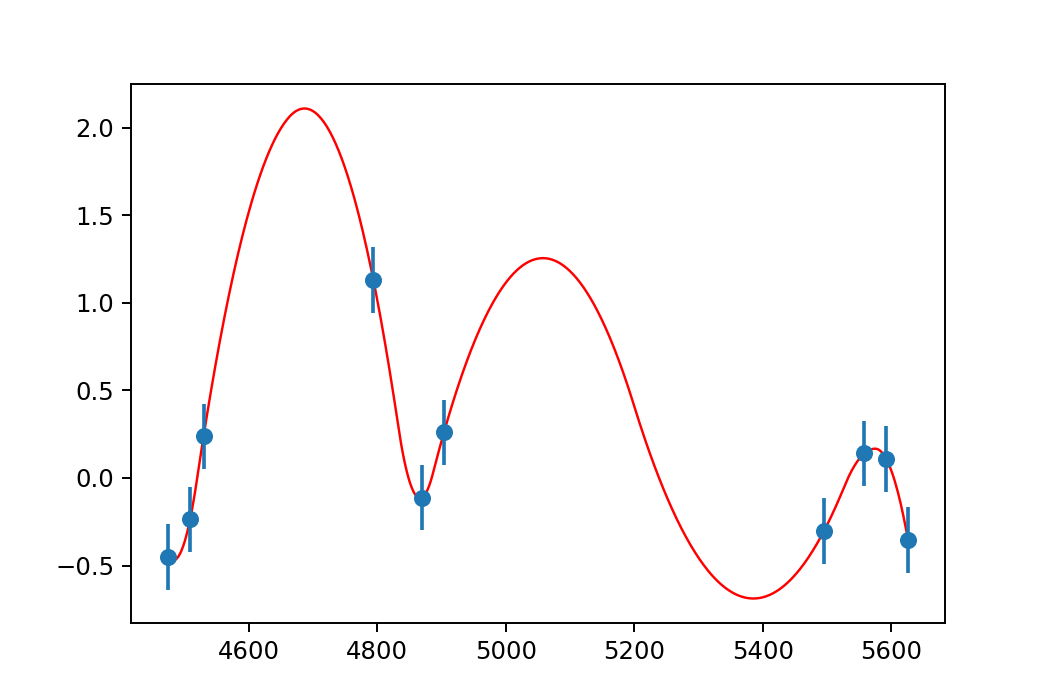

In [13]:
plt.figure(figsize=(6, 4))

x2 = time2
y2 = dataK
x_new = np.linspace(min(x2), max(x2),500)
f = interp1d(x2, y2, kind='quadratic')
y_smooth=f(x_new)

plt.errorbar(time2, dataK, yerr=0.00013* 1440, fmt='o', label="TESS transits",zorder=2)
plt.plot(x_new,y_smooth,color='red', linewidth=1,zorder=1)